In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images 

Using TensorFlow backend.
/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/andreapalladino/ana

### read the video and generate frames

In [3]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


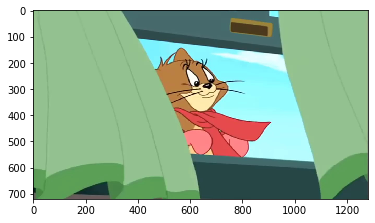

In [4]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)
plt.show()

### creating features and target

In [5]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [6]:
# This creates the features X

X = [ ]     # creating an empty array
for img_name in data['Image_ID']:
    img = plt.imread(img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [7]:
# This creates the target y

y = data.Class
dummy_y = np.array(pd.get_dummies(y))   # one hot encoding Classes

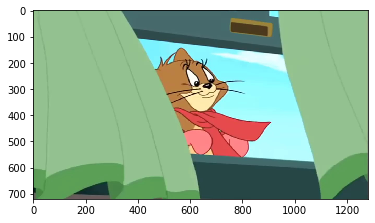

In [8]:
plt.imshow(X[0,:])

### preprocessing of features

In [9]:
# resize images
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(100,100)).astype(int)      # reshaping to 100*100*3 (3 colors)
    image.append(a)
X = np.array(image)
X=X.reshape(len(X),100*100*3)

In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X/256, dummy_y, test_size=0.2, stratify=y)    # preparing the validation set

In [11]:
X_train.shape

(238, 30000)

In [12]:
X_train.max()

0.99609375

### creating the machine learning algorithm

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from keras.layers.core import Dense, Dropout, Activation

In [14]:
ncols=X.shape[1]

In [16]:
model=Sequential()

#add model layers
#model.add(Conv2D(100, kernel_size=3, activation='relu', input_shape=(100,100,3)))
#model.add(Conv2D(100, kernel_size=3, activation='relu'))
#model.add(Conv2D(100, kernel_size=3, activation='relu'))
#model.add(Flatten())
model.add(Dense(100,activation='relu',input_shape=(ncols,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3, activation='softmax'))   # there are 3 possible outputs

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#early_stopping_monitor = EarlyStopping(patience=5)
history = model.fit(X_train,y_train,
          batch_size=128, epochs=100,
          validation_data=(X_test,y_test))#,callbacks=[early_stopping_monitor])#,verbose=1)

print("Loss function: " + model.loss)

Train on 238 samples, validate on 60 samples
Epoch 1/100
238/238 [==============================] - 2s 8ms/step - loss: 2.4447 - acc: 0.3739 - val_loss: 8.3913 - val_acc: 0.3667
Epoch 2/100
238/238 [==============================] - 0s 1ms/step - loss: 7.2288 - acc: 0.3739 - val_loss: 5.0184 - val_acc: 0.3833
Epoch 3/100
238/238 [==============================] - 0s 1ms/step - loss: 3.7516 - acc: 0.3277 - val_loss: 6.6072 - val_acc: 0.4000
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 6.4237 - acc: 0.4034 - val_loss: 5.9897 - val_acc: 0.4000
Epoch 5/100
238/238 [==============================] - 0s 1ms/step - loss: 4.8284 - acc: 0.4496 - val_loss: 5.4428 - val_acc: 0.3833
Epoch 6/100
238/238 [==============================] - 0s 1ms/step - loss: 4.9128 - acc: 0.3739 - val_loss: 4.2432 - val_acc: 0.3833
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 2.7078 - acc: 0.4370 - val_loss: 1.7293 - val_acc: 0.5167
Epoch 8/100
238/238 [===

Epoch 62/100
238/238 [==============================] - 0s 1ms/step - loss: 0.1735 - acc: 0.9496 - val_loss: 0.5152 - val_acc: 0.8500
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1705 - acc: 0.9454 - val_loss: 0.5554 - val_acc: 0.7667
Epoch 64/100
238/238 [==============================] - 0s 1ms/step - loss: 0.1871 - acc: 0.9454 - val_loss: 0.5926 - val_acc: 0.7833
Epoch 65/100
238/238 [==============================] - 0s 1ms/step - loss: 0.2694 - acc: 0.9286 - val_loss: 0.5381 - val_acc: 0.8167
Epoch 66/100
238/238 [==============================] - 0s 1ms/step - loss: 0.2619 - acc: 0.9118 - val_loss: 0.6124 - val_acc: 0.8000
Epoch 67/100
238/238 [==============================] - 0s 1ms/step - loss: 0.2888 - acc: 0.9118 - val_loss: 0.5261 - val_acc: 0.8333
Epoch 68/100
238/238 [==============================] - 0s 1ms/step - loss: 0.1747 - acc: 0.9580 - val_loss: 0.5536 - val_acc: 0.8167
Epoch 69/100
238/238 [==============================] - 0s 1ms

### evaluating the performance of the model

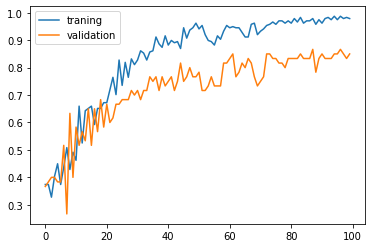

In [17]:
# accuracy for each epoche

plt.plot(history.history['acc'],label='traning')
plt.plot(history.history['val_acc'],label='validation')
plt.legend()
plt.show()

In [18]:
# confusion matrix

risultati_test=np.round(model.predict(X_test),1)

#print(risultati con dataset di test)
finres_test=np.argmax(risultati_test,axis=1)
y_test2=np.argmax(np.array(y_test),axis=1)

pd.DataFrame(confusion_matrix(y_test2,finres_test))

,0,1,2
0,19,0,3
1,1,10,3
2,1,1,22
